## Mitesh Manani
## Cohort 3 - Roll No.:- 2023PAI9266

####  Task 1 :- Rotation Implementation

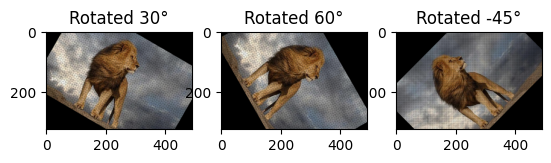

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2


def rotate_image(image, angle):
    angle_rad = np.deg2rad(angle)
    cos_val, sin_val = np.cos(angle_rad), np.sin(angle_rad)

    rotation_matrix = np.array([[cos_val, -sin_val],
                                [sin_val, cos_val]])

    h, w = image.shape[:2]
    center_x, center_y = w // 2, h // 2

    rotated_image = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            x, y = j - center_x, i - center_y
            new_x, new_y = np.dot(rotation_matrix, [x, y])
            new_x, new_y = int(new_x + center_x), int(new_y + center_y)
            if 0 <= new_x < w and 0 <= new_y < h:
                rotated_image[new_y, new_x] = image[i, j]

    return rotated_image

img = np.array(Image.open('C:\\Users\\mites\\OneDrive\\Desktop\\CV_Assignment 2 (Pics)\\8kd8qhz2do_Lion_King.jpg'))
rotated_30 = rotate_image(img, 30)
rotated_60 = rotate_image(img, 60)
rotated_minus_45 = rotate_image(img, -45)

plt.subplot(131), plt.imshow(rotated_30), plt.title('Rotated 30°')
plt.subplot(132), plt.imshow(rotated_60), plt.title('Rotated 60°')
plt.subplot(133), plt.imshow(rotated_minus_45), plt.title('Rotated -45°')
plt.show()


### Comparison with OpenCV: Use OpenCV's built-in rotation function for comparison:



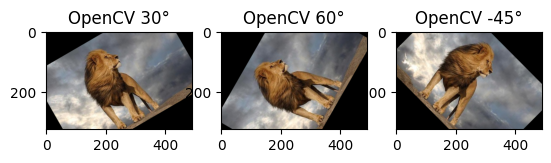

In [2]:
import cv2

def rotate_with_opencv(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (w, h))

rotated_cv_30 = rotate_with_opencv(img, 30)
rotated_cv_60 = rotate_with_opencv(img, 60)
rotated_cv_minus_45 = rotate_with_opencv(img, -45)

# Compare results
plt.subplot(131), plt.imshow(rotated_cv_30), plt.title('OpenCV 30°')
plt.subplot(132), plt.imshow(rotated_cv_60), plt.title('OpenCV 60°')
plt.subplot(133), plt.imshow(rotated_cv_minus_45), plt.title('OpenCV -45°')
plt.show()


###  Task 2:- Transformation Matrix Calculation

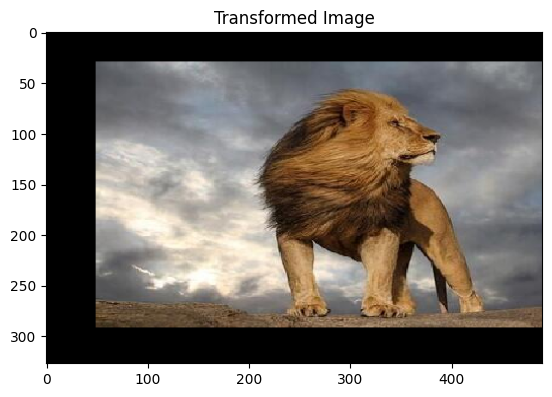

In [3]:
def get_transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx],
                     [0, sy, dy],
                     [0, 0, 1]])

def apply_transformation(image, matrix):
    h, w = image.shape[:2]
    transformed_image = np.zeros_like(image)
    inv_matrix = np.linalg.inv(matrix)  

    for i in range(h):
        for j in range(w):
            coords = np.array([j, i, 1])
            new_coords = np.dot(inv_matrix, coords)
            new_x, new_y = int(new_coords[0]), int(new_coords[1])

            if 0 <= new_x < w and 0 <= new_y < h:
                transformed_image[i, j] = image[new_y, new_x]

    return transformed_image

matrix = get_transformation_matrix(50, 30, 1.2, 0.8)
transformed_image = apply_transformation(img, matrix)
plt.imshow(transformed_image), plt.title('Transformed Image')
plt.show()


### Task 3:- Combining Transformations

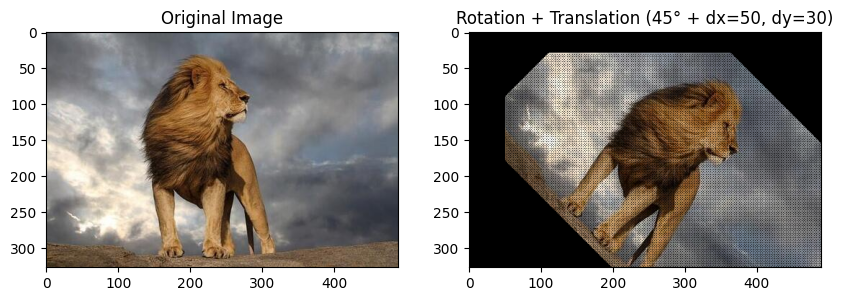

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


img = np.array(Image.open('C:\\Users\\mites\\OneDrive\\Desktop\\CV_Assignment 2 (Pics)\\8kd8qhz2do_Lion_King.jpg'))
h, w = img.shape[:2]  


def get_transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx],
                     [0, sy, dy],
                     [0, 0, 1]])


def apply_transformation(image, matrix):
    h, w = image.shape[:2]
    transformed_image = np.zeros_like(image)
    inv_matrix = np.linalg.inv(matrix)  
    
    for i in range(h):
        for j in range(w):
            coords = np.array([j, i, 1])
            new_coords = np.dot(inv_matrix, coords)
            new_x, new_y = int(new_coords[0]), int(new_coords[1])

            if 0 <= new_x < w and 0 <= new_y < h:
                transformed_image[i, j] = image[new_y, new_x]

    return transformed_image

def rotate_image(image, angle):
    angle_rad = np.deg2rad(angle)
    cos_val, sin_val = np.cos(angle_rad), np.sin(angle_rad)
    
    rotation_matrix = np.array([[cos_val, -sin_val],
                                [sin_val, cos_val]])
    
    h, w = image.shape[:2]
    center_x, center_y = w // 2, h // 2
    
    rotated_image = np.zeros_like(image)
    
    for i in range(h):
        for j in range(w):
            x, y = j - center_x, i - center_y
            new_x, new_y = np.dot(rotation_matrix, [x, y])
            new_x, new_y = int(new_x + center_x), int(new_y + center_y)

            if 0 <= new_x < w and 0 <= new_y < h:
                rotated_image[new_y, new_x] = image[i, j]

    return rotated_image


def apply_combined_transformations(image, rotation_angle, dx, dy, sx, sy):
    
    rotated_image = rotate_image(image, rotation_angle)
    transformation_matrix = get_transformation_matrix(dx, dy, sx, sy)
    transformed_image = apply_transformation(rotated_image, transformation_matrix)
    return transformed_image

rotation_angle = 45  
dx, dy = 50, 30      
sx, sy = 1, 1       
result_image = apply_combined_transformations(img, rotation_angle, dx, dy, sx, sy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title(f'Rotation + Translation (45° + dx={dx}, dy={dy})')

plt.show()



### When combining transformations, the order matters. For example, rotating first and then translating results in a different outcome than translating first and then rotating.


